# Análisis Exploratorio de Datos

## Contexto

Base del Sistema Nacional de Vigilancia Epidemiologica para el seguimiento a posibles casos de COVID-19 en la Ciudad de México.

### **Importar librerias**

In [1]:
%config IPCompleter.greedy=True
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 110)
pd.set_option('display.max_columns', 120)

### **Conjunto de datos inicial**

In [2]:
data = pd.read_csv("datasets/sinaveCovid.csv")

D:\Programas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (86) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


El registro mas antiguo es del 1 de enero de 2020 y el mas reciente del 1 de julio del 2021

In [3]:
data.shape

(4282087, 92)

Debido a que se declara pandemia el 11 de marzo del 2020 se tomaran los registros desde esa fecha

In [4]:
data = data[data['fechreg'] >= '2020-03-11']

In [5]:
data['fechreg'].min(), data['fechreg'].max(), data.shape

('2020-03-11T00:00:00Z', '2021-10-21T00:00:00Z', (4279365, 92))

Se tiene un conjunto de datos de 2987791 filas y 92 columnas

## Población universitaria

Se filtra el conjunto de datos por la ocupación = estudaiantes y mayores a 18 años siendo la población universitaria y de posgrado finalizando con total de 174143 filas.

In [6]:
dataUni = data.loc[(data['ocupacio'] == 'ESTUDIANTES') & (data['edad'] >= 18)]
dataUni.shape

(264243, 92)

In [7]:
dataUni = dataUni.drop('ocupacio', inplace=False, axis=1)

Se realiza de nuevo el filtrado de la data esta vez solo rescatando aquellos que pertenezcan a la Ciudad de México.

Finalizando con una extensión  de 155,931 filas

In [8]:
dataUniCDMX = dataUni.loc[(dataUni['entresi'] == 'CIUDAD DE MEXICO')]
dataUniCDMX.shape

(238185, 91)

Eliminamos la columna de entresi y cventine ya que sabemos que pertenecen a la CDMX

In [9]:
dataUniCDMX = dataUniCDMX.drop('entresi', inplace=False, axis=1)
dataUniCDMX = dataUniCDMX.drop('cventine', inplace=False, axis=1)

## Valores nulos

Observamos los valores nulos para cada columna

Podemos observar que las columnas de viaje2, viaje3, viaje4, viaje5, linaje y diaspuerp tienen en todas las filas un valor de NaN por lo que se podan del conjunto de datos

In [10]:
dataUniCDMX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238185 entries, 43 to 4282078
Data columns (total 89 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   origen               238185 non-null  object 
 1   sector               238185 non-null  object 
 2   cveentuni            238185 non-null  int64  
 3   entidad              238185 non-null  object 
 4   delega               238185 non-null  object 
 5   unidad               238185 non-null  object 
 6   fechreg              238185 non-null  object 
 7   sexo                 238185 non-null  object 
 8   mpioresi             238184 non-null  object 
 9   cvemuni              238184 non-null  float64
 10  locresi              238184 non-null  object 
 11  cvelocal             238184 non-null  float64
 12  tipacien             238185 non-null  object 
 13  evoluci              238179 non-null  object 
 14  fecdef               146 non-null     object 
 15  semdef         

Drop de columnas con valores nulos en todas las filas

In [11]:
dataUniCDMX = dataUniCDMX.drop('diaspuerp', inplace=False, axis=1)
dataUniCDMX = dataUniCDMX.drop('linaje', inplace=False, axis=1)
dataUniCDMX = dataUniCDMX.drop('viaje2', inplace=False, axis=1)
dataUniCDMX = dataUniCDMX.drop('viaje3', inplace=False, axis=1)
dataUniCDMX = dataUniCDMX.drop('viaje4', inplace=False, axis=1)
dataUniCDMX = dataUniCDMX.drop('viaje5', inplace=False, axis=1)
dataUniCDMX.shape

(238185, 83)

**Creación del conjunto de datos con estado y ocupación filtrado**

In [12]:
dataUniCDMX.to_csv("datasets/UniCDMX.csv", index=False)

# Datos universitarios de la Ciudad de México

In [13]:
dataUniCDMX = pd.read_csv("datasets/UniCDMX.csv")

D:\Programas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Observamos que como valor máximo de edad es de 121, lo cual es un valor atípico dentro del conjunto por lo que se procede a realizar el estudio de esta variable.

In [14]:
dataUniCDMX['edad'].describe()

count    238185.000000
mean         23.311938
std           7.085604
min          18.000000
25%          19.000000
50%          22.000000
75%          25.000000
max         121.000000
Name: edad, dtype: float64

<AxesSubplot:xlabel='edad'>

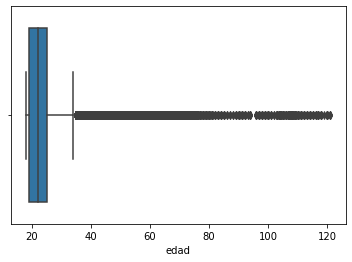

In [15]:
sns.boxplot(x='edad', data=dataUniCDMX)

<AxesSubplot:xlabel='edad'>

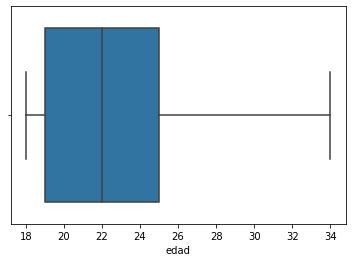

In [16]:
sns.boxplot(x='edad', data=dataUniCDMX, showfliers=False)

In [17]:
rango = dataUniCDMX['edad'].unique().tolist()
rango.sort()

In [18]:
edades = {}
outliers = 0
for edad in rango:
    edades[edad] = sum(dataUniCDMX['edad'] == edad)
    if(edad >= 56):
        outliers += edades[edad]
(outliers * 100) / dataUniCDMX.shape[0]

0.9610176963284842

In [19]:
dataUniCDMX = dataUniCDMX.loc[(dataUniCDMX['edad'] <= 56)]
dataUniCDMX.shape

(236108, 83)

In [20]:
dataUniCDMX.to_csv("datasets/UniCDMXEdad.csv", index=False)

# Datos Universitarios 18-56 de la Ciudad de México

## Eliminación de variables

In [21]:
data = pd.read_csv("datasets/UniCDMXEdad.csv")
data.shape

(236108, 83)

**Drop de campos de la unidad médica**

Estas variables no tienen repercusión en el pronóstico de COVID-19 debido a que pertenecen a u aquellas que .

In [22]:
data = data.drop('origen', inplace=False, axis=1)
data = data.drop('sector', inplace=False, axis=1)
data = data.drop('cveentuni', inplace=False, axis=1)
data = data.drop('entidad', inplace=False, axis=1)
data = data.drop('delega', inplace=False, axis=1)
data = data.drop('unidad', inplace=False, axis=1)
data = data.drop('tipacien', inplace=False, axis=1)
data = data.drop('evoluci', inplace=False, axis=1)
data = data.drop('fecdef', inplace=False, axis=1)
data = data.drop('semdef', inplace=False, axis=1)
data = data.drop('intubado', inplace=False, axis=1)
data = data.drop('seringre', inplace=False, axis=1)
data = data.drop('fecingre', inplace=False, axis=1)
data = data.drop('diagprob', inplace=False, axis=1)
data = data.drop('tommue', inplace=False, axis=1)
data = data.drop('labora', inplace=False, axis=1)
data = data.drop('uci', inplace=False, axis=1)
data = data.drop('antigencovid', inplace=False, axis=1)
data = data.drop('fecha_actualizacion', inplace=False, axis=1)
data = data.drop('hableind', inplace=False, axis=1)
data = data.drop('follabor', inplace=False, axis=1)
data.shape

(236108, 62)

**Drop de claves de variables**

In [23]:
data = data.drop('cvemuni', inplace=False, axis=1)
data = data.drop('cvelocal', inplace=False, axis=1)

**Variables de texto abiertas**

In [24]:
data = data.drop('locresi', inplace=False, axis=1)
data = data.drop('antivira', inplace=False, axis=1)
data = data.drop('conanima', inplace=False, axis=1)
data = data.drop('paisnal', inplace=False, axis=1)
data = data.drop('paisori', inplace=False, axis=1)
data = data.drop('viaje1', inplace=False, axis=1)
data.shape

(236108, 54)

## **Gráficas**

### **Distribución de edades**

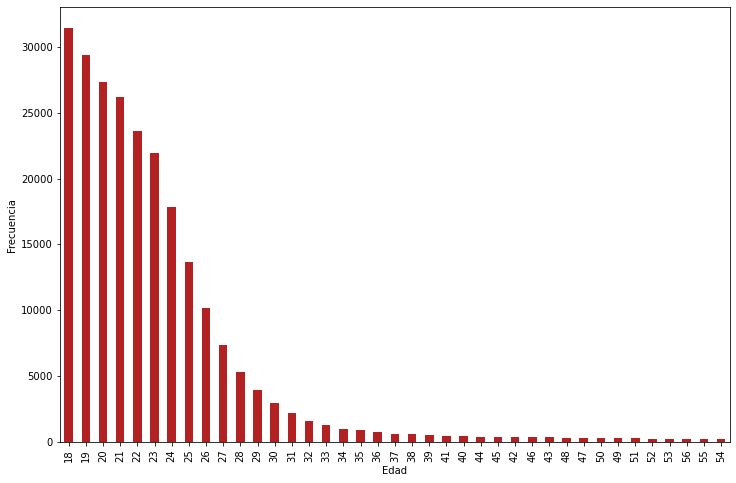

In [25]:
data['edad'].value_counts().plot(kind='bar', color='firebrick', figsize=(12, 8))
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.xticks(rotation='vertical')
plt.show()

### **Distribución de municipios de residencia**

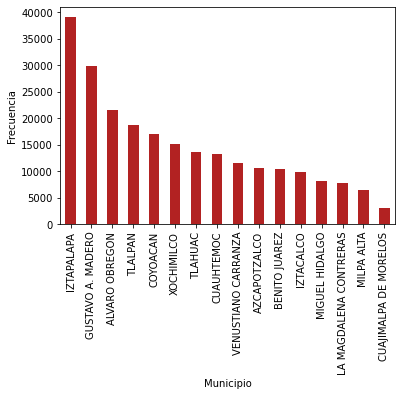

In [26]:
data['mpioresi'].value_counts().plot(kind='bar', color='firebrick')
plt.xlabel("Municipio")
plt.ylabel("Frecuencia")
plt.xticks(rotation='vertical')
plt.show()

### **Distribución de género**

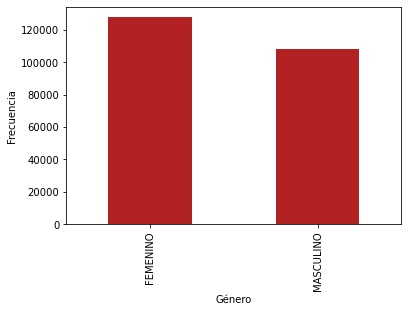

In [27]:
data['sexo'].value_counts().plot(kind='bar', color='firebrick')
plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.xticks(rotation='vertical')
plt.show()

### **Distribución del resultado de la muestra**

In [28]:
data['resdefin'].value_counts()

NEGATIVO                  185465
SARS-CoV-2                 45858
RECHAZADA                    688
NO ADECUADO                  410
NO RECIBIDA                  128
B                             11
ENTEROV//RHINOVIRUS            5
SARS-CoV-2 - B.1.1.519         3
VSR                            2
SARS-CoV-2 - DELTA             2
SARS-CoV-2 - LAMBDA            1
PARAINFLUENZA 1                1
CORONA OC43                    1
INF A                          1
SARS-CoV-2 - GAMMA             1
NO AMPLIFICO                   1
PARAINFLUENZA 2                1
SARS-CoV-2 - MU                1
Name: resdefin, dtype: int64

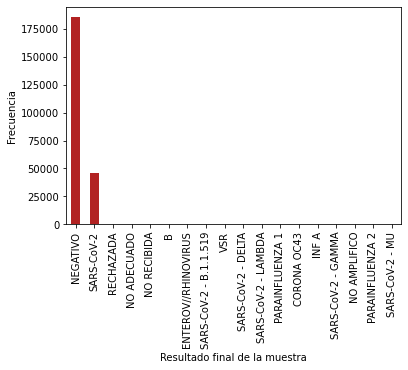

In [29]:
data['resdefin'].value_counts().plot(kind='bar', color='firebrick')
plt.xlabel("Resultado final de la muestra")
plt.ylabel("Frecuencia")
plt.xticks(rotation='vertical')
plt.show()

La distribución de los datos en el campo de resultado definitivo de la muestra solo es signifiativo para que el modelo reconozca patrones en las categorias de NEGATIVO y SARS-CoV-2, se eliminara el resto de categorías.

Igualmenta el campo sera representado como 0 en NEGATIVO y 1 cuadno hay SARS-CoV-2

In [30]:
data['resdefin'].unique()

array(['NEGATIVO', 'SARS-CoV-2', nan, 'NO ADECUADO', 'RECHAZADA',
       'NO RECIBIDA', 'B', 'ENTEROV//RHINOVIRUS', 'CORONA OC43',
       'SARS-CoV-2 - GAMMA', 'INF A', 'SARS-CoV-2 - MU',
       'SARS-CoV-2 - B.1.1.519', 'VSR', 'NO AMPLIFICO', 'PARAINFLUENZA 1',
       'SARS-CoV-2 - DELTA', 'SARS-CoV-2 - LAMBDA', 'PARAINFLUENZA 2'],
      dtype=object)

In [32]:
categorias = ['NO RECIBIDA', 'RECHAZADA',
       'NO ADECUADO', 'B', 'NO AMPLIFICO', 'ENTEROV//RHINOVIRUS',
       'INF AH1N1 PMD', 'CORONA OC43', 'INF A', 'PARAINFLUENZA 2', 'SARS-CoV-2 - B.1.1.519', 'SARS-CoV-2 - DELTA',
        'SARS-CoV-2 - GAMMA', 'SARS-CoV-2 - LAMBDA', 'SARS-CoV-2 - MU', 'VSR', 'PARAINFLUENZA 1', 'NaN', 'nan']
for categoria in categorias:
    data = data.drop(data[data['resdefin'] == categoria].index)

data = data[data['resdefin'].notna()]

In [33]:
data['resdefin'].mask(data['resdefin'] == 'NEGATIVO', 0, inplace=True)
data['resdefin'].mask(data['resdefin'] == 'SARS-CoV-2', 1, inplace=True)
data.shape

(231323, 54)

In [34]:
data['resdefin'].unique()

array([0, 1], dtype=object)

## **Sexo a numérica**

* Femenino 0
* Masculino 1

In [35]:
data['sexo'].mask(data['sexo'] == 'FEMENINO', 0, inplace=True)
data['sexo'].mask(data['sexo'] == 'MASCULINO', 1, inplace=True)

## **Nacionalidad a numérica**

* Mexicana 0
* Extranjera 1

In [36]:
data['naciona'].mask(data['naciona'] == 'MEXICANA', 0, inplace=True)
data['naciona'].mask(data['naciona'] == 'EXTRANJERA', 1, inplace=True)

### **One Hot Encoder**

**Drop de filas en nulo**

In [37]:
data = data[data['mpioresi'].notna()]
data = data[data['resdefin'].notna()]
data.shape

(231322, 54)

In [38]:
columnUniqueValues = {}

In [39]:
def EncodeCategorical(data, variable, columnUniqueValues):
    columnUniqueValues[variable] = data[variable].unique().tolist()
    data = pd.concat([data, pd.get_dummies(data[variable], prefix='', prefix_sep='')], axis=1)
    data = data.drop(variable, inplace=False, axis=1)
    return data

In [40]:
encodeVariables = ['mpioresi']
for var in encodeVariables:
    data = EncodeCategorical(data, var, columnUniqueValues)
data

,fechreg,sexo,digcline,edad,naciona,estaemba,mesesemb,esindige,fecinisi,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,dolabdo,conjun,cianosis,inisubis,diabetes,epoc,asma,inmusupr,hiperten,vih_sida,otracon,enfcardi,obesidad,insrencr,tabaquis,rectrata,txcrobia,txantivi,fecinitxantivi,conocaso,contaves,concerdo,vacunado,fecvaest,resdefin,esmigra,fingmex,puerperio,antipireticos,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,CUAUHTEMOC,GUSTAVO A. MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
0,2021-07-16T00:00:00Z,1,NO,18,0,NaN,NaN,NO,2021-07-08T00:00:00Z,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,SI,NO,NO,SI,2020-11-15T00:00:00Z,0,NaN,NaN,NaN,NO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-07-04T00:00:00Z,0,NO,22,0,NO,NaN,NO,2021-06-30T00:00:00Z,NO,NO,SI,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,SI,NO,NO,SI,2020-11-20T00:00:00Z,0,NaN,NaN,NO,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2020-11-06T00:00:00Z,1,NO,18,0,NaN,NaN,NO,2020-11-01T00:00:00Z,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,SI,NO,NO,NO,NaN,1,NaN,NaN,NaN,NO,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2021-08-18T00:00:00Z,1,NO,32,1,NaN,NaN,NO,2021-08-11T00:00:00Z,SI,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,NO,NO,NaN,0,NO,NaN,NaN,NO,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2021-08-06T00:00:00Z,1,NO,23,0,NO,0.0,NO,2021-07-23T00:00:00Z,NO,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NaN,NO,NO,NO,NO,NaN,1,NaN,NaN,NaN,NO,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236103,2021-02-03T00:00:00Z,1,NO,18,0,NO,0.0,NO,2021-01-06T00:00:00Z,NO,SI,SI,NO,NO,SI,SI,NO,SI,NO,NO,SI,SI,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NaN,NO,NO,NO,NO,NaN,1,NaN,NaN,NaN,NO,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
236104,2021-05-11T00:00:00Z,0,NO,23,0,NO,NaN,NO,2021-05-11T00:00:00Z,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NaN,NO,NO,NO,NO,NaN,0,NaN,NaN,NO,NO,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
236105,2021-06-10T00:00:00Z,1,NO,25,0,NaN,NaN,NaN,2021-06-10T00:00:00Z,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,NO,NO,NaN,0,NaN,NaN,NaN,NO,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
236106,2021-05-21T00:00:00Z,1,NO,19,0,NaN,NaN,NaN,2021-05-21T00:00:00Z,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,NO,NO,NaN,0,NaN,NaN,NaN,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
import json

In [42]:
with open('datasets/uniqueVariable.json', 'w') as json_file:
  json.dump(columnUniqueValues, json_file)

In [43]:
data.to_csv("datasets/UniCDMXOHE.csv", index=False)

### **Campos de fechas**

In [44]:
data = pd.read_csv('datasets/UniCDMXOHE.csv')

In [45]:
def ConvertirFecha(data, variable):
    data[variable] = pd.to_datetime(data[variable]) # Conversión a Timestamp
    data[variable] = data[variable].dt.tz_localize(None) # Eliminación del uso horario
    data[variable] = pd.to_datetime(data[variable]).dt.date # Eliminación del tiempo
    # Separación por día mes y año de todas las variables de fecha
    data[variable + '_dia'] = pd.DatetimeIndex(data[variable]).day
    data[variable + '_dia'] = data[variable + '_dia'].fillna(0)
    
    data[variable + '_mes'] = pd.DatetimeIndex(data[variable]).month
    data[variable + '_mes'] = data[variable + '_mes'].fillna(0)
    
    data[variable + '_año'] = pd.DatetimeIndex(data[variable]).year
    data[variable + '_año'] = data[variable + '_año'].fillna(0)
    
    data.drop(variable, inplace=True, axis=1)

In [46]:
def RestarFecha(data, variable1, variable2):
    data[variable2] = (pd.to_datetime(data[variable1]) - pd.to_datetime(data[variable2]))
    data[variable2] = data[variable2].dt.days

Observamos que las columnas de fecinitxantivi y fingmex no cuentan con el suficiente número de registros como para que el modelo genere asociacoines respecto a estas variables por lo que se eliminan

In [47]:
sum(data['fecinitxantivi'].notnull()), sum(data['fecvaest'].notnull()), sum(data['fingmex'].notnull())

(805, 35088, 0)

In [48]:
data = data.drop('fecinitxantivi', inplace=False, axis=1)
data = data.drop('fingmex', inplace=False, axis=1)

In [49]:
RestarFecha(data, 'fechreg', 'fecinisi')
RestarFecha(data, 'fechreg', 'fecvaest')
#ConvertirFecha(data, 'fechreg')
data = data.drop('fechreg', inplace=False, axis=1)

In [50]:
data

,sexo,digcline,edad,naciona,estaemba,mesesemb,esindige,fecinisi,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,dolabdo,conjun,cianosis,inisubis,diabetes,epoc,asma,inmusupr,hiperten,vih_sida,otracon,enfcardi,obesidad,insrencr,tabaquis,rectrata,txcrobia,txantivi,conocaso,contaves,concerdo,vacunado,fecvaest,resdefin,esmigra,puerperio,antipireticos,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,CUAUHTEMOC,GUSTAVO A. MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
0,1,NO,18,0,NaN,NaN,NO,8,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,SI,243.0,0,NaN,NaN,NO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,NO,22,0,NO,NaN,NO,4,NO,NO,SI,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,SI,226.0,0,NaN,NO,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,NO,18,0,NaN,NaN,NO,5,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NaN,1,NaN,NaN,NO,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,NO,32,1,NaN,NaN,NO,7,SI,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,0,NO,NaN,NO,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,NO,23,0,NO,0.0,NO,14,NO,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,NO,NO,NO,NaN,1,NaN,NaN,NO,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231317,1,NO,18,0,NO,0.0,NO,28,NO,SI,SI,NO,NO,SI,SI,NO,SI,NO,NO,SI,SI,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,NO,NO,NO,NaN,1,NaN,NaN,NO,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
231318,0,NO,23,0,NO,NaN,NO,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NaN,0,NaN,NO,NO,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
231319,1,NO,25,0,NaN,NaN,NaN,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,0,NaN,NaN,NO,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
231320,1,NO,19,0,NaN,NaN,NaN,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,0,NaN,NaN,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='fecinisi'>

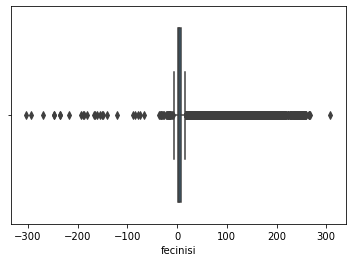

In [51]:
sns.boxplot(x='fecinisi', data=data)

<AxesSubplot:xlabel='fecinisi'>

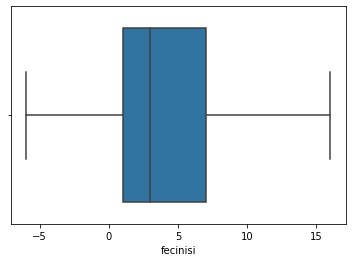

In [52]:
sns.boxplot(x='fecinisi', data=data, showfliers=False)

<AxesSubplot:xlabel='fecvaest'>

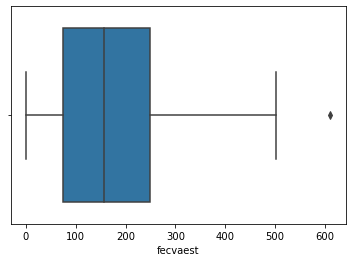

In [53]:
sns.boxplot(x='fecvaest', data=data)

<AxesSubplot:xlabel='fecvaest'>

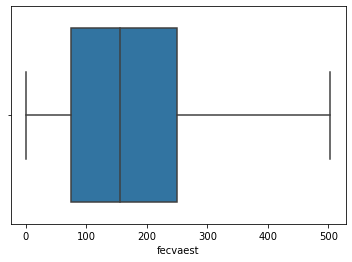

In [54]:
sns.boxplot(x='fecvaest', data=data, showfliers=False)

In [55]:
data['fecinisi'] = data['fecinisi'].fillna(0)
data['fecvaest'] = data['fecvaest'].fillna(0)
data = data.drop(data[data['fecinisi'] > 15].index)
data = data.drop(data[data['fecinisi'] < -5].index)
data = data.drop(data[data['fecvaest'] > 400].index)
data = data.drop(data[data['fecvaest'] < 0].index)

In [56]:
data

,sexo,digcline,edad,naciona,estaemba,mesesemb,esindige,fecinisi,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,dolabdo,conjun,cianosis,inisubis,diabetes,epoc,asma,inmusupr,hiperten,vih_sida,otracon,enfcardi,obesidad,insrencr,tabaquis,rectrata,txcrobia,txantivi,conocaso,contaves,concerdo,vacunado,fecvaest,resdefin,esmigra,puerperio,antipireticos,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,CUAUHTEMOC,GUSTAVO A. MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
0,1,NO,18,0,NaN,NaN,NO,8,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,SI,243.0,0,NaN,NaN,NO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,NO,22,0,NO,NaN,NO,4,NO,NO,SI,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,SI,226.0,0,NaN,NO,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,NO,18,0,NaN,NaN,NO,5,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,0.0,1,NaN,NaN,NO,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,NO,32,1,NaN,NaN,NO,7,SI,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0.0,0,NO,NaN,NO,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,1,NO,23,0,NO,0.0,NO,14,NO,SI,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NaN,NO,NO,NO,NO,NO,0.0,1,NaN,NaN,NO,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231315,1,NO,18,0,NaN,NaN,NO,1,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0.0,0,NaN,NaN,NO,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
231318,0,NO,23,0,NO,NaN,NO,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,SI,NO,NO,NO,NO,NO,NO,NO,0.0,0,NaN,NO,NO,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
231319,1,NO,25,0,NaN,NaN,NaN,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0.0,0,NaN,NaN,NO,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
231320,1,NO,19,0,NaN,NaN,NaN,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,NO,0.0,0,NaN,NaN,NO,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### **Cambio de variables a booleanas**

In [57]:
varBoolean = ['digcline', 'estaemba', 'esindige', 'fiebre', 'tos', 'odinogia', 'disnea',
              'irritabi', 'diarrea', 'dotoraci', 'calofrios', 'cefalea', 'mialgias', 'artral', 'ataedoge', 'rinorrea',
              'polipnea', 'vomito', 'dolabdo', 'conjun', 'cianosis', 'inisubis', 'diabetes', 'epoc', 'asma', 'inmusupr',
              'hiperten', 'vih_sida', 'otracon', 'enfcardi', 'obesidad', 'insrencr', 'tabaquis', 'rectrata', 'txcrobia',
              'txantivi', 'conocaso', 'contaves', 'concerdo', 'vacunado', 'esmigra', 'puerperio',
              'antipireticos']

for i in varBoolean:
    cuenta = data[data[i] == 'SE IGNORA'].shape[0]
    print(i + ': ' + str(cuenta))

digcline: 0
estaemba: 849
esindige: 0
fiebre: 142
tos: 122
odinogia: 148
disnea: 91
irritabi: 105
diarrea: 107
dotoraci: 152
calofrios: 150
cefalea: 114
mialgias: 151
artral: 134
ataedoge: 130
rinorrea: 150
polipnea: 140
vomito: 125
dolabdo: 139
conjun: 162
cianosis: 134
inisubis: 225
diabetes: 105
epoc: 80
asma: 83
inmusupr: 77
hiperten: 84
vih_sida: 87
otracon: 87
enfcardi: 93
obesidad: 87
insrencr: 80
tabaquis: 94
rectrata: 0
txcrobia: 0
txantivi: 0
conocaso: 0
contaves: 0
concerdo: 0
vacunado: 25
esmigra: 0
puerperio: 0
antipireticos: 0


In [58]:
def ChangeBoolean(data, variable):
    data[variable] = data[variable].fillna(0)
    data[variable].mask(data[variable] == 'NO', 0, inplace=True)
    data[variable].mask(data[variable] == 'SE IGNORA', 0, inplace=True)
    data[variable].mask(data[variable] == 'SI', 1, inplace=True)

In [59]:
for variable in varBoolean:
    ChangeBoolean(data, variable)

In [60]:
data['mesesemb'] = data['mesesemb'].fillna(int(0))

In [61]:
data.shape

(206224, 66)

In [62]:
# Información rendundante con fecha vacunación y vacunado
data = data.drop('vacunado', inplace=False, axis=1)
# Solo se estudian casos de pacientes mexicanos
data = data.drop(data[data['naciona'] == 1].index)
data = data.drop('naciona', inplace=False, axis=1)
data = data.drop('esindige', inplace=False, axis=1)
data = data.drop('esmigra', inplace=False, axis=1)
# Informació rendundante de embarazadas
data = data.drop('estaemba', inplace=False, axis=1)

In [63]:
data.to_csv("datasets/UniCDMXEdadFilter.csv", index=False)

In [64]:
data = pd.read_csv("datasets/UniCDMXEdadFilter.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204472 entries, 0 to 204471
Data columns (total 61 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   sexo                    204472 non-null  int64  
 1   digcline                204472 non-null  int64  
 2   edad                    204472 non-null  int64  
 3   mesesemb                204472 non-null  float64
 4   fecinisi                204472 non-null  int64  
 5   fiebre                  204472 non-null  int64  
 6   tos                     204472 non-null  int64  
 7   odinogia                204472 non-null  int64  
 8   disnea                  204472 non-null  int64  
 9   irritabi                204472 non-null  int64  
 10  diarrea                 204472 non-null  int64  
 11  dotoraci                204472 non-null  int64  
 12  calofrios               204472 non-null  int64  
 13  cefalea                 204472 non-null  int64  
 14  mialgias            

In [65]:
data

,sexo,digcline,edad,mesesemb,fecinisi,fiebre,tos,odinogia,disnea,irritabi,diarrea,dotoraci,calofrios,cefalea,mialgias,artral,ataedoge,rinorrea,polipnea,vomito,dolabdo,conjun,cianosis,inisubis,diabetes,epoc,asma,inmusupr,hiperten,vih_sida,otracon,enfcardi,obesidad,insrencr,tabaquis,rectrata,txcrobia,txantivi,conocaso,contaves,concerdo,fecvaest,resdefin,puerperio,antipireticos,ALVARO OBREGON,AZCAPOTZALCO,BENITO JUAREZ,COYOACAN,CUAJIMALPA DE MORELOS,CUAUHTEMOC,GUSTAVO A. MADERO,IZTACALCO,IZTAPALAPA,LA MAGDALENA CONTRERAS,MIGUEL HIDALGO,MILPA ALTA,TLAHUAC,TLALPAN,VENUSTIANO CARRANZA,XOCHIMILCO
0,1,0,18,0.0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,243.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,22,0.0,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,226.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,1,0,18,0.0,5,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,23,0.0,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,1,0,20,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,90.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204467,1,0,18,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
204468,0,0,23,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
204469,1,0,25,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
204470,1,0,19,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [66]:
for var in data.columns.values:
    print(var)
    print(data[var].value_counts())
    print('\n')

sexo
0    110990
1     93482
Name: sexo, dtype: int64


digcline
0    203180
1      1292
Name: digcline, dtype: int64


edad
18    27391
19    25456
20    23800
21    22562
22    20474
23    19005
24    15451
25    11852
26     8782
27     6363
28     4615
29     3425
30     2546
31     1896
32     1335
33     1076
34      811
35      749
36      627
37      557
38      495
39      460
41      402
40      401
44      357
45      332
42      330
46      311
48      307
43      296
47      285
50      259
51      252
49      248
52      215
53      207
56      183
55      181
54      178
Name: edad, dtype: int64


mesesemb
0.0     203583
8.0        215
9.0        156
7.0         93
3.0         84
5.0         80
2.0         69
6.0         68
4.0         57
1.0         43
10.0        24
Name: mesesemb, dtype: int64


fecinisi
 0     49836
 1     27228
 2     24023
 3     23361
 4     17793
 5     14198
 6     10505
 7      9902
 8      6415
 9      4617
 10     4430
 11     3349
 12     24